# PANDASTIC
![image.png](https://i.supload.com/BylkfuHzlE.jpg)

# <font color='blue'>L I B R A R I E S</font>
<hr>

In [4]:
import os
import os.path
import datetime
# %matplotlib inline/notebook
# to use it in jupyter notebook
%matplotlib inline
import sys
import numpy as np
from scipy import stats
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from pandas import Series, DataFrame
import mysql.connector
import sqlalchemy
from sqlalchemy import create_engine
import seaborn as sns
# Ref: https://stackoverflow.com/questions/9632995/how-to-easily-print-ascii-art-text
# pyfiglet - pure Python implementation of http://www.figlet.org
# pip install pyfiglet
# termcolor - helper functions for ANSI color formatting
# pip install termcolor
# colorama - multiplatform support (Windows)
# pip install colorama
from colorama import init
init(strip=not sys.stdout.isatty()) # strip colors if stdout is redirected
from termcolor import colored, cprint 
from pyfiglet import figlet_format
# ------------------------------------------------------------------------------

# <font color='blue'>F U N C T I O N S</font>
<hr>

## <font color='blue'>enter_to_continue</font>
Mainly use to pause or add print message for debugging
<hr>

In [5]:
# ------------------------------------------------------------------------------
def enter_to_continue(messageIn=None):  
    if (messageIn is None):
        messageIn = ''
    print(f'\n{messageIn}')
    input('Press [ENTER] to continue'+'.'*8)
# ------------------------------------------------------------------------------     

## <font color='blue'>enter_to_continue</font>
Mainly use to pause or add print message for debugging
<hr>

In [6]:
# ------------------------------------------------------------------------------     
# use to get a option of Y/N      
def get_yes_no_condition(messageIn=None, defaultOption='N'):
    yesNo = ''
    if (messageIn is None) | (messageIn == ''):
        messageIn = 'Choice'
    while yesNo=='':    
        yesNo = input(messageIn+', (Y/N) Press [Enter] for '+defaultOption+'? ')
        if yesNo=='':
            yesNo = defaultOption
        elif str.upper(yesNo) not in ['y', 'n', 'Y', 'N', 'yes', 'no', 'Yes', 'No', 'YES', 'NO']:
            yesNo = ''
    if (str.upper(yesNo) == 'Y') | (str.upper(yesNo) == 'YES'):
        return(True)    
    else:
        return(False)
# ------------------------------------------------------------------------------     
        


## <font color='blue'>get_option</font>
Prompt user to select of of the available option based on options available provided in a dataframe.
<hr>

In [7]:
# ------------------------------------------------------------------------------
def get_option(arrayOfOptionsIn=None):
    optionSelected = ''
    o = 1
    noOfOptions = len(arrayOfOptionsIn)
    print('Options available:')
    for option in arrayOfOptionsIn:
        print(f'{o}. {option}')
        o = o + 1
    while optionSelected=='':    
        optionSelected = input('Select option from 1 to '+str(noOfOptions)+': ')
        if (optionSelected < '1') | (optionSelected > str(len(arrayOfOptionsIn))):
            optionSelected = ''
        return(optionSelected)    
# ------------------------------------------------------------------------------        


# <font color='blue'>print_line
Print a line of characters x 80</font>
<hr>

In [8]:
# ------------------------------------------------------------------------------
def print_line(charToPrint): # print a line of character(s) x 80
    print(charToPrint*80)
# ------------------------------------------------------------------------------


# <font color='blue'>read_file_to_df
Read a file into a dataframe</font>
<hr>

In [11]:
# ------------------------------------------------------------------------------
def read_file_to_df(fileToRead, rowsToReadIn=0, noOfSampleRowsToPrintIn=30): 
    fileExt = os.path.splitext(fileToRead)[-1].lower()
    # xxxx print(f'f i l e E x t = {fileExt}')
    
    # read_csv Ref: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
    if (rowsToReadIn==0): # LIVE mode
        # file type 
        if fileExt=='.csv':
            dfRead = pd.read_csv(fileToRead, 
                                 sep=',',
                                 header='infer')
        elif fileExt in ('.xls', '.xlsx'):
            dfRead = pd.read_excel(fileToRead)                
    else:
        if fileExt=='.csv':
            dfRead = pd.read_csv(fileToRead, 
                                 sep=',',
                                 header='infer',
                                 nrows=rowsToReadIn)
        elif fileExt in ('.xls', '.xlsx'):
            dfRead = pd.read_excel(fileToRead, 
                                 nrows=rowsToReadIn)
        
    if noOfSampleRowsToPrintIn > 0:
        if noOfSampleRowsToPrintIn==1:
            print(f'The first row in this data set is:')
        elif dfRead.shape[0]==1:
            noOfSampleRowsToPrintIn==1
            print(f'This file has only one row which is:')
        elif dfRead.shape[0]<noOfSampleRowsToPrintIn: 
            print(f'This file has only {dfRead.shape[0]} rows which are:')
        else:    
            print(f'The first {noOfSampleRowsToPrintIn} rows in this data set are:')
        print(dfRead[0:noOfSampleRowsToPrintIn] )    ####xxxx use head

    return(dfRead)    
        
    print(f'rows, columns counts = {df.shape}') 
    print(f'rows count = {df.shape[0]}') 
    print(f'rows count = {df.shape[1]}') 
    print(f'the columns are {df.types}')
    print(f'the first column is {df.types[0]}')
# ------------------------------------------------------------------------------


# <font color='blue'>M A I N</font>
<hr>

* Pandas ‘EAT’ the file in a folder: default or user specified
* Read in if CSV or Excel – other file types not process
* Tell you some information about the dataset, e.g., rows, columns, type of data
* Option to see descriptive statistics and skewness of data
* Option to see all rows of data if not more than 30
* Option to see line chart, bar chart & horizontal bar chart if dataset has only 2 columns 
** quarters column ticks only Q4
** change colour for each file
* At the end, list of all files processed


Run mode = [LIVE]
Press [Enter] to continue OR Enter "TEST" and press [Enter] to change run mode: 
runMode = <built-in method upper of str object at 0x0000028BD2F17AB0>
.______       __    __  .__   __.    .___  ___.   ______    _______   _______ 
|   _  \     |  |  |  | |  \ |  |    |   \/   |  /  __  \  |       \ |   ____|
|  |_)  |    |  |  |  | |   \|  |    |  \  /  | |  |  |  | |  .--.  ||  |__   
|      /     |  |  |  | |  . `  |    |  |\/|  | |  |  |  | |  |  |  ||   __|  
|  |\  \----.|  `--'  | |  |\   |    |  |  |  | |  `--'  | |  '--'  ||  |____ 
| _| `._____| \______/  |__| \__|    |__|  |__|  \______/  |_______/ |_______|
                                                                              
            __       __  ____    ____  _______ 
 ______    |  |     |  | \   \  /   / |   ____|
|______|   |  |     |  |  \   \/   /  |  |__   
 ______    |  |     |  |   \      /   |   __|  
|______|   |  `----.|  |    \    /    |  |____ 
           |_______||__|     \__/     

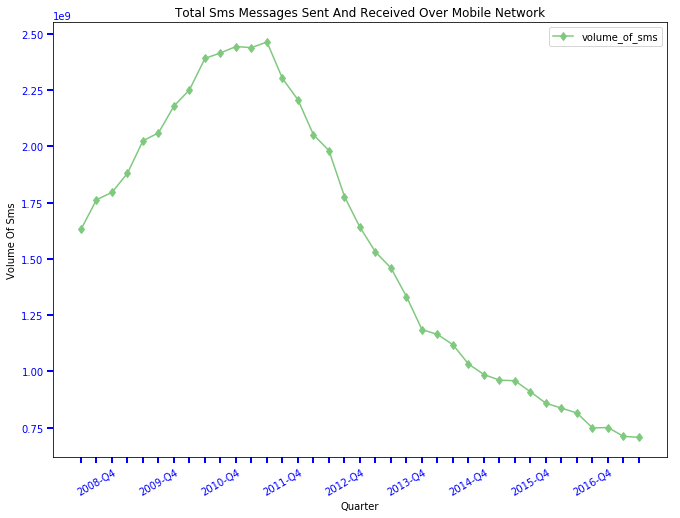


Bar chart
---------


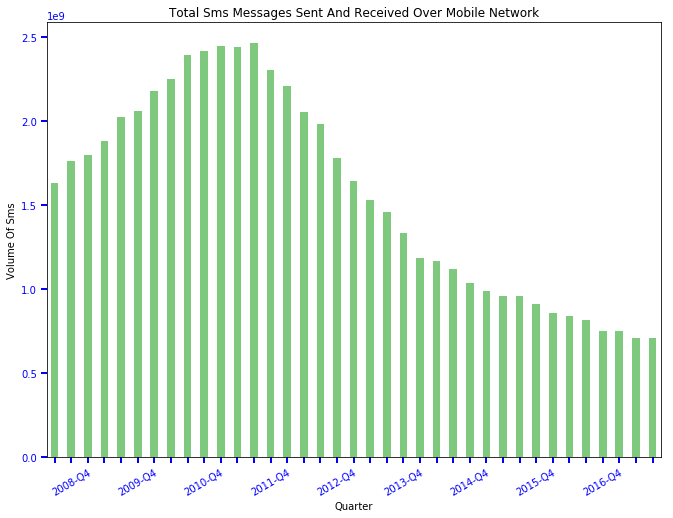


Horizontal Bar chart
--------------------


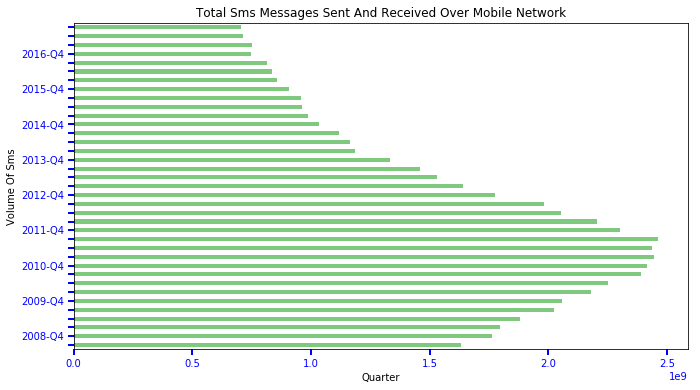




Press [ENTER] to continue........
Processing file 3: c:\pyai\datasets\take2\mobile-data-usage.csv

--------------------------------------------------------------------------------
This is the shape of the dataset 
(53, 2)

This is the index of the dataset 
RangeIndex(start=0, stop=53, step=1)

These are the columns in the dataset 
Index(['quarter', 'volume_of_mobile_data'], dtype='object')

The total number of non-NA values in this dataset is:
quarter                  53
volume_of_mobile_data    53
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
quarter                  53 non-null object
volume_of_mobile_data    53 non-null float64
dtypes: float64(1), object(1)
memory usage: 928.0+ bytes
A summary of this dataset is shown below:
None

--------------------------------------------------------------------------------
The dataset has 53 rows and these 2 columns:
                          type
quarter                 ob

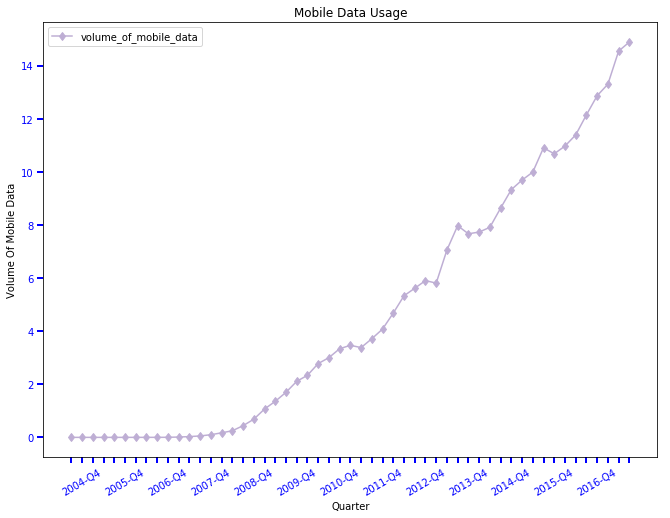


Bar chart
---------


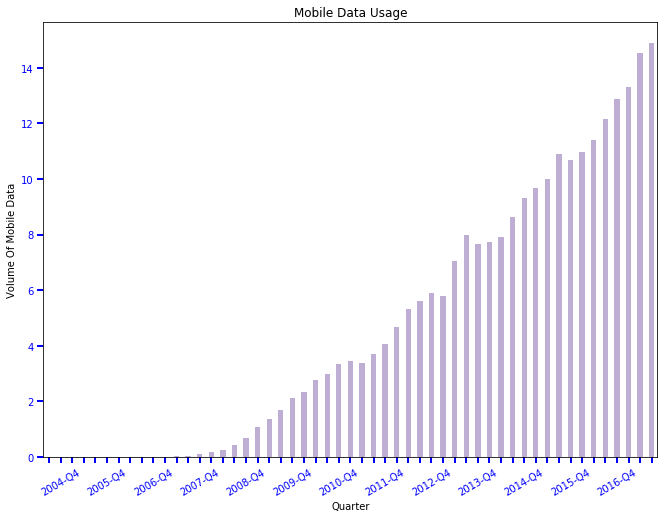


Horizontal Bar chart
--------------------


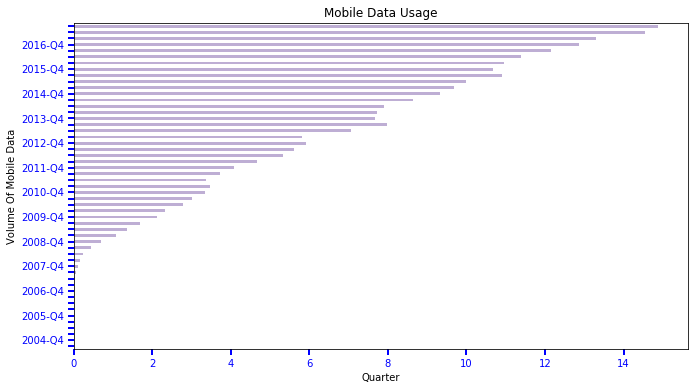




Press [ENTER] to continue........
********************************************************************************
The following {fx} files have been process:
1. c:\pyai\datasets\cea-salesperson-information.csv
2. c:\pyai\datasets\take2\total-sms-messages-sent-and-received-over-mobile-network.csv
3. c:\pyai\datasets\take2\mobile-data-usage.csv
********************************************************************************
.___________. __    __       ___      .__   __.  __  ___ 
|           ||  |  |  |     /   \     |  \ |  | |  |/  / 
`---|  |----`|  |__|  |    /  ^  \    |   \|  | |  '  /  
    |  |     |   __   |   /  /_\  \   |  . `  | |    <   
    |  |     |  |  |  |  /  _____  \  |  |\   | |  .  \  
    |__|     |__|  |__| /__/     \__\ |__| \__| |__|\__\ 
                                                         
____    ____  ______    __    __      _______   ______   .______      
\   \  /   / /  __  \  |  |  |  |    |   ____| /  __  \  |   _  \     
 \   \/   / |  |  |  |

In [12]:
#### import mysql.connector
import sys
import os
import time
%matplotlib inline
%matplotlib inline

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# initialisation
defaultRunMode = 'LIVE' # test, TEST, live or LIVE
# colors = ('red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'black')
# current_palette = sns.color_palette()
# Ref: https://seaborn.pydata.org/tutorial/color_palettes.html
# Also try 
'''
# sns.palplot(one of these)
# e.g., sns.palplot(sns.color_palette())
# Qualitative color palettes 
sns.color_palette("hls", 8)
sns.hls_palette(8, l=.3, s=.8)
sns.color_palette("husl", 8)
sns.color_palette("Paired")
sns.color_palette("Set2")
sns.color_palette(flatui))
sns.xkcd_palette(colors)
# Sequential color palettes
sns.color_palette("Blues")
sns.color_palette("BuGn_r")
sns.color_palette("GnBu_d")
sns.color_palette("cubehelix", 8))
sns.cubehelix_palette(8)

sns.cubehelix_palette(8, start=.5, rot=-.75)
sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True)
# Custom sequential palettes
sns.light_palette("green")
sns.dark_palette("purple")
sns.light_palette("navy", reverse=True)
sns.light_palette((210, 90, 60), input="husl")
sns.dark_palette("muted purple", input="xkcd")
# Diverging color palettes
sns.color_palette("BrBG", 7)
sns.color_palette("RdBu_r", 7)
sns.color_palette("coolwarm", 7)
# Custom diverging palettes
sns.diverging_palette(220, 20, n=7)
sns.diverging_palette(145, 280, s=85, l=25, n=7)
sns.diverging_palette(10, 220, sep=80, n=7)
sns.diverging_palette(255, 133, l=60, n=7, center="dark")
'''
colors = sns.color_palette('Accent')
cx = 0 # colour indexing
pieChartOptions = ('Pie chart by quantity', 'Pie chart by percentage', 'Pie Charts by quantity and percentage')
user, pw, host,db = 'root','it8701','127.0.0.1','mydatabase' ##### xxxx 'hdb'
credentials = dict(MYSQL_HOST=host,
                   MYSQL_USER=user,
                   MYSQL_PASSWD=pw,
                   MYSQL_DB=db)
noOfSampleRowsToPrint = 10 # print these first number of rows after reading the file
numericType = ('int64', 'float64')
validFileType = ('.csv', '.xls', '.xlsx')
fillMissing = ('none', 'mean', 'median', 'forward') # xxxxx
current_palette = sns.color_palette()
myfigsize = (11,8)


# R U N  M O D E ################################
runMode = ''
while runMode=='':
    print(f'Run mode = [{defaultRunMode}]')  
    if defaultRunMode=='TEST':
        alternateRunMode = 'LIVE'
    else:
        alternateRunMode = 'TEST'
        
    runMode = input(f'Press [Enter] to continue OR Enter "{alternateRunMode}" and press [Enter] to change run mode: ')
    print(f'runMode = {runMode.upper}')
    if runMode == '':
        runMode = defaultRunMode
    elif runMode.upper() == alternateRunMode:      
        runMode = alternateRunMode
        print(f'Running mode switched to {runMode}')
    else:
        runMode = ''

cprint(figlet_format('Run mode = '+runMode, font='starwars'),
       'yellow', 'on_red', attrs=['bold'])

if runMode == 'TEST':
    rowsToRead = 300
    print(f'Up to {rowsToRead} rows will be read from each file.')    
else: # running for PRODUCTION
    rowsToRead = 0 # 0 ==> read all rows
    print(f'ALL rows will be read from each file.')    
print_line('*')


# P R O C E S S  F I L E ################################
defaultIndir = 'c:\pyai\datasets'
indir = ''
while indir=='':
    print(f'Default folder = [{defaultIndir}]')  
    indir = input('Where is the data located? Press [Enter] for default folder: ')
    if indir=='':
        indir = defaultIndir
    elif not(os.path.isdir(indir)):

        print(f'Folder [{indir}] not found')
        indir = ''
            
print(f'Going through files in folder [{indir}]'+'.'*8+'\n')
print_line('*')


c = 0 # for varying color for each file process # xxxxxx
fid = 1
for folderName, subFolder, filenames in os.walk(indir):
    filenames.sort(reverse=True)
    for filename in filenames:
        fq_filename = os.path.join(folderName, filename)
        ext = os.path.splitext(filename)[-1].lower()
        # Assume a title from filename # xxxxx
        titleFromFilename = str.title(str.replace(filename, '-', ' ')).split(sep='.')[0]
        
        colourUsed = False # xxxx for deciding if colour is used in this round # xxxxx
        #### Processing the file
        if ext in validFileType:
            print(f'Processing file {fid}: {fq_filename}')
            print()
            # Read file to data frame
            dataRows = read_file_to_df(fq_filename, rowsToRead, 0)
            print_line('-')
        
            print(f'This is the shape of the dataset \n{dataRows.shape}\n')
            print(f'This is the index of the dataset \n{dataRows.index}\n')
            print(f'These are the columns in the dataset \n{dataRows.columns}\n')
            print(f'The total number of non-NA values in this dataset is:\n{dataRows.count()}\n')
            print(f'A summary of this dataset is shown below:\n{dataRows.info()}\n')

            print_line('-')
            noOfRows, noOfCols = dataRows.shape
            print(f'The dataset has {noOfRows} rows and these {noOfCols} columns:')
                   
            dataColumns = DataFrame(dataRows.dtypes)
            dataColumns.columns = ['type']
            print(dataColumns)     
            print()

            ### Presenting S T A T I S T I C S --------------------------------------------------------------------
            wantToSeeStats = get_yes_no_condition ('Do you want to see statistics information this dataset')
            if wantToSeeStats:
                dataDesc = dataRows.describe(include='all').append(dataRows.isnull().sum().rename('isnull')) 
                print(f'\nDescriptive Statistics\n----------------------\n{dataDesc}')    # Summary Statistics

                dataSkew = dataRows.skew()
                print(f'\nSkewness Information\n--------------------\n{dataSkew}')
                            
            ### Presenting A L L   R O W S
            ### when not more than 30 and not all rows displayed in sample displayed
            if (noOfRows<=30) and (noOfRows>noOfSampleRowsToPrint) :
                print(f'\nThere are not more than 30 rows in this dataset.')
                wantToSeeAllRows = get_yes_no_condition ('Do you want to see all rows of data in this dataset')
                if wantToSeeAllRows:
                    print(f'\nAll {noOfRows} rows in this dataset\n-----------------------------')
                    print(f'{dataRows}')

                    
            ### Presenting C H A R T S ------------------------------------------------------------
            column2DType = dataColumns.iat[1,0]
            print()
            column1 = dataColumns.index[0]
            column2 = dataColumns.index[1]
            column1Label = str.title(str.replace(column1, '_', ' '))
            column2Label = str.title(str.replace(column2, '_', ' '))
                      
            if ((noOfCols==2) & ((column2DType=='int64') | (column2DType=='float64'))): 
            # When only 2 columns in dataset and 2nd column is numeric
                print(f'This dataset has only these 2 columns: {column1} and {column2}')
                print(f'2nd column {column2} is numeric')
                wantToSeeCharts = get_yes_no_condition ('Do you want to see charts related to this dataset')
                if wantToSeeCharts:
                    currentColour = colors[cx]
                    chartTitle = str.title(str.replace(filename, '-', ' ')).split(sep='.')[0] # assumed from filename
                    

                    ### L I N E C H A R T ----------------------------------------------------------
                    print()
                    print('Line chart')
                    print('----------')
                    xTickChart = Series(dataRows[column1])
                    if (column1=='quarter') | (column1=='Quarter'):    
                        for xt in range(noOfRows):
                            if xTickChart[xt][-2:]!='Q4':
                                xTickChart[xt] = ''  # force non-Q4 X Lable to blank

                    linechart = dataRows.plot(kind='line', 
                                              x=column1, y=column2,
                                              figsize=(myfigsize),   
                                              title=chartTitle,
                                              marker='d',
                                              color=currentColour)
                    linechart.tick_params(axis='both', 
                                         which='both', 
                                         direction='out', length=6, width=2, 
                                         colors='b',grid_color='b', grid_alpha=0.5)
                    linechart.set(xlabel=column1Label, ylabel=column2Label) #### nice labels
    
                    if (column1=='quarter') | (column1=='Quarter'):   
                        plt.xticks(dataRows.index, dataRows[column1], rotation=90)
                        linechart.set_xticklabels(xTickChart,
                                                 rotation=30, 
                                                 rotation_mode='default')
                    else: # set xlimits
                        nothing = 'nothing'
                        plt.xticks(xTickChart, rotation=90)
                    plt.show()

                    ### B A R C H A R T ------------------------------------------------------------------
                    print()
                    print('Bar chart')
                    print('---------')
                    barchart = dataRows.plot(kind='bar', 
                                             x=column1, 
                                             y=column2, rot=90,
                                             figsize=(myfigsize),                                             
                                             color=currentColour,
                                             legend=False, 
                                             width=0.46,
                                             title=chartTitle)
                    barchart.tick_params(axis='both', 
                                         # which='major', 
                                         direction='out', length=6, width=2, 
                                         colors='b',grid_color='b', grid_alpha=0.5)
                    barchart.set(xlabel=column1Label, ylabel=column2Label) #### nice labels

                    barchart.set_xticklabels(xTickChart,
                                             rotation=30, 
                                             rotation_mode='default')
                    plt.show()

                    
                    ### B A R C H A R T   H O R I Z O N T A L -----------------------------------------------------
                    print()
                    print('Horizontal Bar chart')
                    print('--------------------')
                                
                    xtickBar = dataRows[column1]                    
                    barchartH = dataRows.plot(kind='barh',                               
                                              figsize=(11,6),
                                              x=column1,
                                              y=column2,   
                                              color=currentColour,
                                              legend=False, 
                                              width=0.46,
                                              title=chartTitle)
                    barchartH.tick_params(axis='both', which='major', 
                                          direction='out', length=6, width=2, 
                                          colors='b',grid_color='b', grid_alpha=0.5)
                    barchartH.set(xlabel=column1Label, ylabel=column2Label) #### nice labels

                    plt.show()

                    
                    
  
                    cx = cx + 1 # next colour
                    if cx>=len(colors):
                        cx = 0

            print()
            enter_to_continue()
        else:
            # For file not process, print file info 
            print(f'NOT processing file {fid}: {fq_filename}')
            try:
                st = os.stat(fq_filename)
            except IOError:
                print (f'Failed to get information about {fq_filename}')
            else:
                print (f'File size: {st.st_size}')
                print (f'File modified: {time.asctime(time.localtime(st.st_mtime))}')
            
        fid = fid + 1
        print_line('=')

# List of files process -----------------------------------------------
fx = 0
print_line('*')
print('The following {fx} files have been process:')
for folderName, subFolder, filenames in os.walk(indir):
    filenames.sort(reverse=True)
    for filename in filenames:
        fq_filename = os.path.join(folderName, filename)
        ext = os.path.splitext(filename)[-1].lower()
        if ext in validFileType:
            fx = fx + 1    
            print(f'{fx}. {fq_filename}')
print_line('*')

# T H A N K    Y O U --------------------------------------------------             
cprint(figlet_format('Thank You for using.', font='starwars'),
       'grey', 'on_blue', attrs=['bold'])
print_line('-')
cprint(figlet_format('Have a nice day.', font='starwars'),
       'yellow', 'on_red', attrs=['bold'])
print_line('=')


 
 

# =======================
# E N D    O F    P R O G R A M
# =======================
